- Mandelbrot code is profiled

- Numba is used

- Acceleration using numba achieved

- Graph measuring computation time is given (OX
number of total iterations, OY - computational
time, two plots - one for numba version, the other
for regular version)

In [8]:
from __future__ import print_function, division, absolute_import

from timeit import default_timer as timer
from matplotlib.pylab import imshow, jet, show, ion
import numpy as np
import matplotlib.pyplot as plt

from numba import njit

In [9]:
# @ njit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

In [10]:
# @ njit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

In [43]:
image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)

In [26]:
from tqdm import tqdm
iter_arr = [2**i for i in range(10)]
time_arr_plain = np.empty(len(iter_arr))
for i,iter in tqdm(enumerate(iter_arr)):
    time = %timeit -o -r 2 -n 2 create_fractal(-2.0, 1.0, -1.0, 1.0, image, iter)
    time_arr_plain[i] = time.best

1it [00:07,  7.36s/it]

2 loops, best of 2: 1.74 s per loop


2it [00:16,  8.26s/it]

2 loops, best of 2: 2.21 s per loop


3it [00:31, 11.38s/it]

2 loops, best of 2: 3.7 s per loop


4it [00:47, 13.09s/it]

2 loops, best of 2: 3.81 s per loop


5it [01:10, 16.74s/it]

2 loops, best of 2: 5.78 s per loop


6it [01:39, 20.85s/it]

2 loops, best of 2: 7.18 s per loop


7it [02:23, 28.71s/it]

2 loops, best of 2: 11.2 s per loop


8it [03:41, 44.12s/it]

2 loops, best of 2: 19 s per loop


9it [05:58, 73.13s/it]

2 loops, best of 2: 34.2 s per loop


10it [10:26, 62.67s/it] 

2 loops, best of 2: 1min 7s per loop


In [27]:
@njit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

In [28]:
@njit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

In [44]:
from tqdm import tqdm
iter_arr = [2**i for i in range(10)]
time_arr_jitted = np.empty(len(iter_arr))
for i,iter in tqdm(enumerate(iter_arr)):
    time = %timeit -o -r 2 -n 2 create_fractal(-2.0, 1.0, -1.0, 1.0, image, iter)
    time_arr_jitted[i] = time.best

3it [00:00, 24.13it/s]

2 loops, best of 2: 5.08 ms per loop
2 loops, best of 2: 8.05 ms per loop
2 loops, best of 2: 15.7 ms per loop
2 loops, best of 2: 27.7 ms per loop
2 loops, best of 2: 49.2 ms per loop


6it [00:00,  6.68it/s]

2 loops, best of 2: 88.5 ms per loop
2 loops, best of 2: 155 ms per loop


8it [00:02,  2.40it/s]

2 loops, best of 2: 287 ms per loop


10it [00:08,  1.55s/it]

2 loops, best of 2: 543 ms per loop
2 loops, best of 2: 1.05 s per loop


10it [00:08,  1.11it/s]


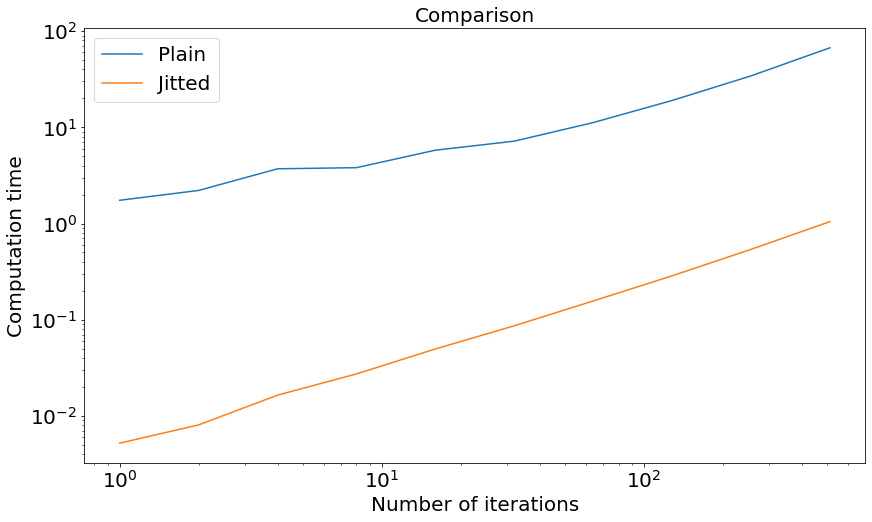

In [41]:
plt.figure(figsize=(14, 8))
plt.plot(iter_arr, time_arr_plain, label='Plain')
plt.plot(iter_arr, time_arr_jitted, label='Jitted')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Comparison',fontsize=20)
plt.xlabel('Number of iterations',fontsize=20)
plt.ylabel('Computation time',fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.show()

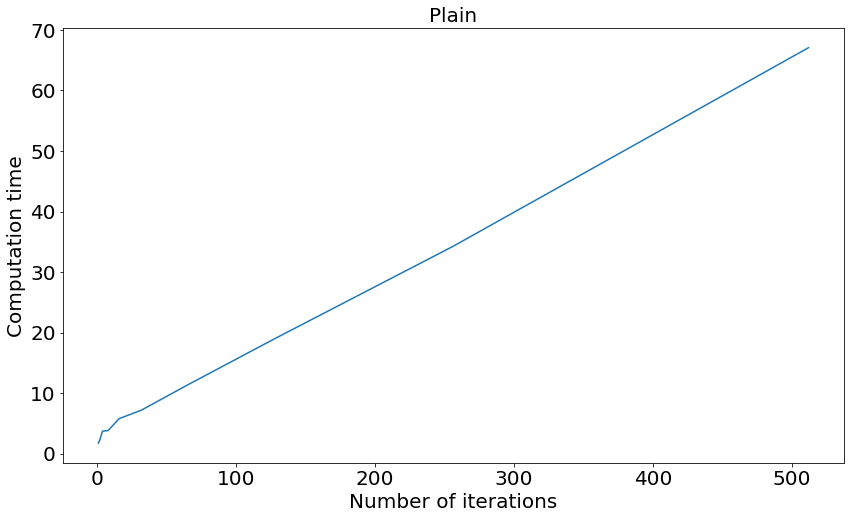

In [40]:
plt.figure(figsize=(14, 8))
plt.plot(iter_arr, time_arr_plain, label='Plain')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Plain',fontsize=20)
plt.xlabel('Number of iterations',fontsize=20)
plt.ylabel('Computation time',fontsize=20)
plt.show()

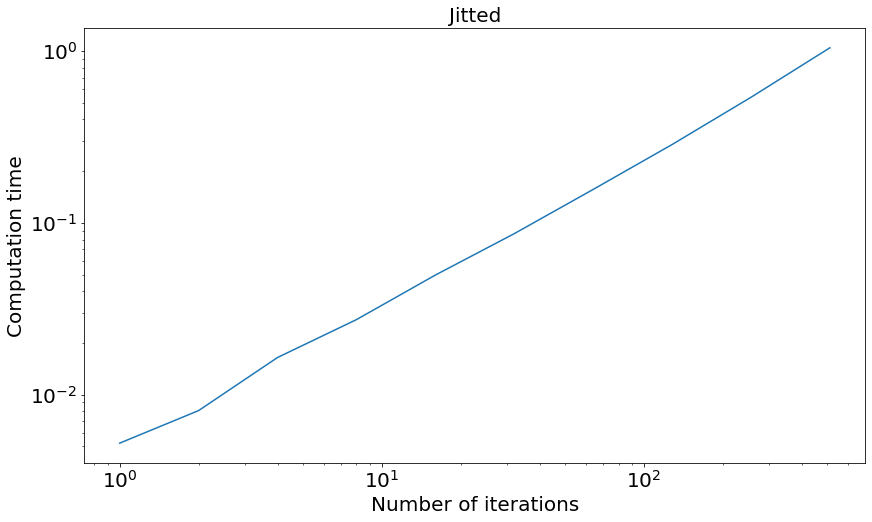

In [38]:
plt.figure(figsize=(14, 8))
plt.plot(iter_arr, time_arr_jitted, label='Jitted')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Jitted',fontsize=20)
plt.xlabel('Number of iterations',fontsize=20)
plt.ylabel('Computation time',fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.show()

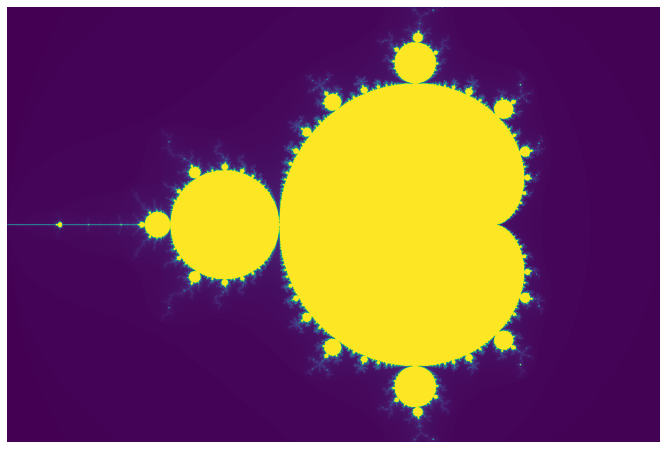

In [47]:
plt.figure(figsize=(14, 8))
plt.imshow(image)
plt.axis('off')
plt.show()